In [1]:
# CODIGO DESAFIO:
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sn 
import pandas as pd
df = pd.read_csv("winequality-red.csv", sep= ';')

In [2]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### 1) No dataset utilizado para o desafio, quantas instâncias e atributos existem, respectivamente?

In [3]:
df.info()
## 1599 instâncias (Linhas/registros/ocorrências)
##   12 Atributos  (Colunas/Caracteristicas)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### 2) Quantos tipos diferentes de dados existem no dataset do desafio?

In [4]:
df.info()
## 2 Tipos de dados:
#   - Float64 (Numeros com vírgula)
#   - Int64   (Numeros inteiros)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### 3) Qual é a proporção (em %) de valores nulos existente na coluna "residual sugar" (resíduo de açúcar)?

In [5]:
df.isnull().sum()
## Não existem valores nulos: 0%

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### 4) Qual é o desvio padrão para a variável "fixed acidity"?

In [6]:
## 1.7
df['fixed acidity'].describe()

count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64

### 5) Qual é a mediana para a variável "residual sugar"?

In [7]:
## 2.2
df['residual sugar'].median()

2.2

### 6) Sobre o coeficiente de correlação de Pearson entre as variáveis "fixed acidity" e "pH", é CORRETO afirmar:

In [8]:
## Existe uma correlação negativa. Quanto maior o "fixed acidity, menor é o "pH".
valor_x=df['fixed acidity']
valor_y=df['pH']
scipy.stats.pearsonr(valor_x, valor_y)[0]

-0.6829781945685319

### 7) Sobre o coeficiente de correlação de Pearson entre as variáveis "quality" e "alcohol", mesmo sendo reduzido, é CORRETO dizer:

In [9]:
## Quanto maior o teor alcoólico (alcohol), maior é a qualidade do vinho (quality).
valor_x=df['quality']
valor_y=df['alcohol']
scipy.stats.pearsonr(valor_x, valor_y)[0]

0.47616632400113584

### CORRELAÇÃO DE TODOS OS CAMPOS

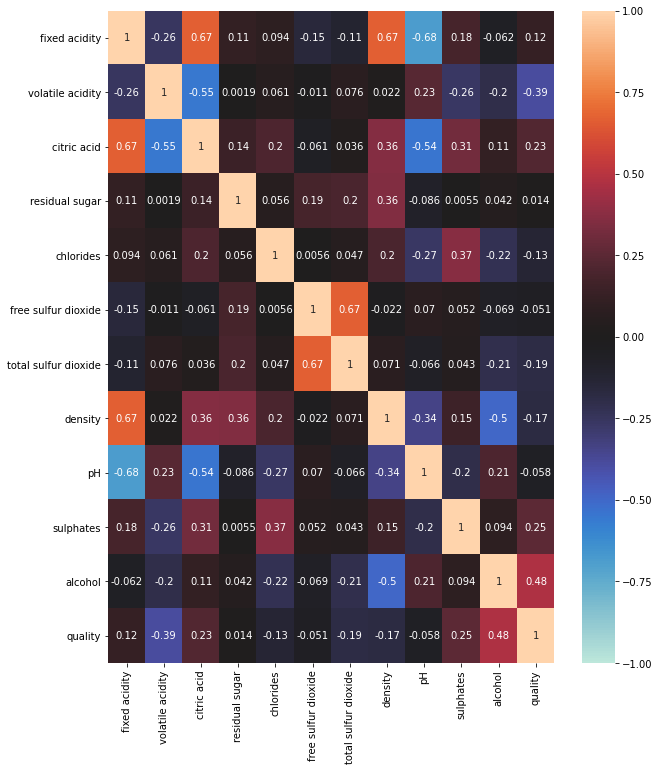

In [10]:
#realizando o plot da matriz de correlação
plt.figure(figsize=(10, 12))
matriz_de_correlação = df.corr()  #construindo a matriz de correlação
sn.heatmap(matriz_de_correlação, annot=True,vmin=-1, vmax=1,center= 0)  #plotando a matriz de correlação com o seaborn
plt.show()

### 8) Quantas instâncias existem para a qualidade do vinho igual a 5?

In [11]:
## 681
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### 9) Aplique o modelo de normalização MinMaxScaler com os valores "default" para os dados de entrada. Qual é o menor valor para a variável "fixed acidity"?

In [12]:
#normalizando os dados (os algoritmos de ML, em geral, não trabalham bem com dados em escalas diferentes)
from sklearn.preprocessing import MinMaxScaler  #biblioteca utilizada para realizar o preprocessamento dos dados
scaler = MinMaxScaler()    #cria o objeto que será utilizado para realizar a normalização dos dados
                                                 # feaure_range = define o intervalo de escala dos dados
scaler_df = df # cria uma cópia do dataframe original
scaler_df = pd.DataFrame(scaler.fit_transform(scaler_df.values), columns=scaler_df.columns, index=scaler_df.index)

In [13]:
scaler_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


In [14]:
## sobreescrevendo o valor original para o campo de interesse:
scaler_df['quality'] = df['quality']
scaler_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,5
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,5
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5


In [15]:
scaler_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.490211,0.449695,0.196496,0.311228,5.636023
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138571,0.121564,0.101501,0.163949,0.807569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231,5.000000
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.448819,0.173653,0.276923,6.000000
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.519685,0.239521,0.415385,6.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [16]:
scaler_df['fixed acidity'].min()

0.0

## CONFIGURAÇÃO DOS DADOS PARA OS MODELOS

In [17]:
columns  =  ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [18]:
## entradas_normalizadas
X = scaler_df[columns].values

In [19]:
## saida
Y = scaler_df['quality'].values

In [20]:
from sklearn import model_selection

In [21]:
# Conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = model_selection.train_test_split(X, Y, 
                                                                         test_size = 0.30, 
                                                                         random_state = 1)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

In [47]:
modelos

[('LR', LogisticRegression()),
 ('LDA', LinearDiscriminantAnalysis()),
 ('KNN', KNeighborsClassifier()),
 ('CART', DecisionTreeClassifier()),
 ('NB', GaussianNB()),
 ('SVM', SVC(gamma='auto')),
 ('FOREST', RandomForestClassifier(max_depth=10, random_state=1)),
 ('MLP',
  MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 5), random_state=1)),
 ('XGB',
  XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
                colsample_bynode=None, colsample_bytree=None, gamma=None,
                gpu_id=None, importance_type='gain', interaction_constraints=None,
                learning_rate=None, max_delta_step=None, max_depth=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                n_estimators=100, n_jobs=None, num_parallel_tree=None,
                random_state=None, reg_alpha=None, reg_lambda=None,
                scale_pos_weight=None, subsample=None, tree_method=None,
                validate_parameters=None, verbosity=Non

# Valor das 10 execuções: LR [0.8125     0.72321429 0.76785714 0.74107143 0.74107143 0.74107143
 0.72321429 0.74107143 0.73214286 0.66666667]
# LR: 0.738988 (0.034684)
# Acurácia dados de Teste: LR 0.7395833333333334
# Valor das 10 execuções: LDA [0.74107143 0.75       0.73214286 0.73214286 0.67857143 0.78571429
 0.79464286 0.82142857 0.70535714 0.67567568]
# LDA: 0.741675 (0.045841)
# Acurácia dados de Teste: LDA 0.7395833333333334
# Valor das 10 execuções: KNN [0.67857143 0.73214286 0.77678571 0.73214286 0.8125     0.75
 0.63392857 0.70535714 0.66964286 0.72972973]
# KNN: 0.722080 (0.049902)
# Acurácia dados de Teste: KNN 0.6958333333333333
# Valor das 10 execuções: CART [0.73214286 0.76785714 0.78571429 0.77678571 0.70535714 0.76785714
 0.73214286 0.74107143 0.77678571 0.72972973]
# CART: 0.751544 (0.025388)
# Acurácia dados de Teste: CART 0.7541666666666667
# Valor das 10 execuções: NB [0.72321429 0.67857143 0.72321429 0.72321429 0.71428571 0.69642857
 0.75892857 0.74107143 0.76785

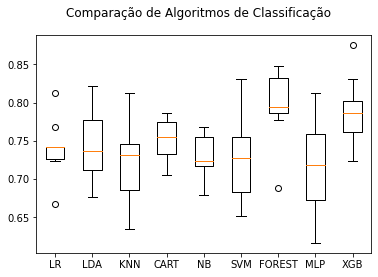

In [59]:
# Criando modelo de Machine Leanring a partir de cada algoritmo
# Vamos utilizar como métrica a acurácia. Quanto maior o valor, melhor.
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('NB', GaussianNB()))
modelos.append(('SVM', SVC(gamma='auto',kernel='rbf')))
modelos.append(('FOREST', RandomForestClassifier(max_depth=10, random_state=1)))
modelos.append(('MLP', MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)))
modelos.append(('XGB', XGBClassifier()))

resultados = []
nomes = []

# Percorrendo cada um dos modelos
for nome, modelo in modelos:
    kfold = model_selection.KFold(n_splits=10, shuffle=True)
    cross_val_result = model_selection.cross_val_score(modelo, X_treino, 
                                                        Y_treino, 
                                                        cv = kfold, 
                                                        scoring = 'accuracy')
    resultados.append(cross_val_result)
    print("========================================================================")
    print("# Valor das 10 execuções:",nome ,cross_val_result)
    nomes.append(nome)
    texto = "# %s: %f (%f)" % (nome, cross_val_result.mean(), cross_val_result.std())
    print(texto)
    

    clf = modelo.fit(X_treino, Y_treino)
    #realiza a previsão com os dados de teste
    y_previsto = clf.predict(X_teste)
    acc = accuracy_score(Y_teste, y_previsto) 
    print('# Acurácia dados de Teste:',nome, acc)
    print("========================================================================")


# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

### 10) Após dividir o dataset utilizando o método train_test_split(entradas_normalizadas, saida, test_size=0.30, random_state=1). Qual foi a acurácia para o KNN?

In [24]:
## 0,56 : Valor aproximado do resultado:
#Valor das 10: KNN [0.55357143 0.5625     0.58928571 0.53571429 0.65178571 0.5625  0.5        0.58928571 0.625      0.63963964]
#KNN: 0.580928 (0.045355)

### 11) Aplicando o algoritmo de árvore de decisão com os parâmetros definidos no enunciado do desafio e a divisão de treinamento e teste, como mostrado anteriormente, qual é o valor da acurácia?

In [25]:
## 0,58 : Valor aproximado do resultado:
#Valor das 10: CART [0.65178571 0.625      0.625      0.57142857 0.5625     0.55357143  0.57142857 0.60714286 0.57142857 0.63063063]
#CART: 0.596992 (0.032926)

### 12) Aplicando o algoritmo de floresta randômica com os mesmos parâmetros apresentados no enunciado e mesmos valores para o treinamento e teste, qual é o valor mais próximo para a acurácia?

In [26]:
## 0,68 : Valor aproximado do resultado:
#Valor das 10: FOREST [0.67857143 0.58928571 0.64285714 0.59821429 0.76785714 0.69642857  0.70535714 0.60714286 0.73214286 0.67567568]
#FOREST: 0.669353 (0.056430)

### 13) Aplicando o algoritmo SVM para a classificação da qualidade dos vinhos com os mesmos valores anteriores para treinamento e teste, qual é o valor mais próximo para a acurácia obtido?

In [27]:
## 0,59 : Valor aproximado do resultado:
#Valor das 10: SVM [0.58928571 0.55357143 0.60714286 0.49107143 0.60714286 0.50892857  0.59821429 0.50892857 0.53571429 0.54054054]
#SVM: 0.554054 (0.041698)

### 14) Aplicando a rede MLP, como mostrado no enunciado, e com os mesmos dados de treinamento e teste utilizados, qual é o valor mais próximo para a acurácia do modelo?

In [28]:
## 0,60 : Valor aproximado do resultado:
#Valor das 10: MLP [0.57142857 0.59821429 0.52678571 0.52678571 0.55357143 0.53571429  0.50892857 0.52678571 0.5625     0.58558559]
#MLP: 0.549630 (0.027795)

### 15) Modifique o dataset para um sistema binário que considere vinhos com nota maior do que 5 (6, 7, 8) sejam bons e menores ou igual a 5 ruins (5, 4, 3). Aplique o modelo da floresta randômica. Qual é o valor mais próximo da acurácia do modelo para esse novo dataset?

In [29]:
scaler_df2 = scaler_df

In [36]:
scaler_df2.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.39726,0.0,0.068493,0.106845,0.140845,0.09894,0.567548,0.606299,0.137725,0.153846,0


In [31]:
scaler_df2['quality']  = scaler_df2['quality'].apply(lambda x: 1 if x > 5 else 0 )

In [37]:
df.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [38]:
scaler_df2.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.39726,0.0,0.068493,0.106845,0.140845,0.09894,0.567548,0.606299,0.137725,0.153846,0


#Valor das 10 execuções: LR [0.74107143 0.75       0.77678571 0.72321429 0.76785714 0.75
 0.73214286 0.75892857 0.75892857 0.67567568]
#LR: 0.743460 (0.027218)
# Acurácia dados de Teste: LR 0.7395833333333334
#Valor das 10 execuções: LDA [0.75892857 0.66964286 0.77678571 0.72321429 0.72321429 0.78571429
 0.76785714 0.71428571 0.75       0.76576577]
#LDA: 0.743541 (0.033750)
# Acurácia dados de Teste: LDA 0.7395833333333334
#Valor das 10 execuções: KNN [0.79464286 0.71428571 0.65178571 0.75892857 0.75       0.80357143
 0.75       0.63392857 0.74107143 0.68468468]
#KNN: 0.728290 (0.053823)
# Acurácia dados de Teste: KNN 0.6958333333333333
#Valor das 10 execuções: CART [0.69642857 0.75       0.75892857 0.70535714 0.78571429 0.75
 0.80357143 0.72321429 0.69642857 0.74774775]
#CART: 0.741739 (0.034638)
# Acurácia dados de Teste: CART 0.7645833333333333
#Valor das 10 execuções: NB [0.72321429 0.71428571 0.73214286 0.70535714 0.75       0.69642857
 0.6875     0.77678571 0.77678571 0.68468468]

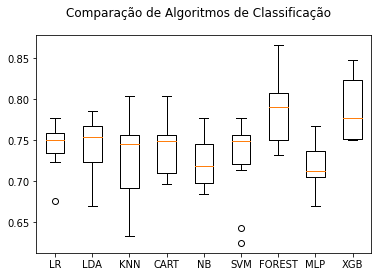

In [60]:
## entradas_normalizadas
X = scaler_df2[columns].values
## saida
Y = scaler_df2['quality'].values
# Conjuntos de dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = model_selection.train_test_split(X, Y, 
                                                                         test_size = 0.30, 
                                                                         random_state = 1)
# Criando modelo de Machine Leanring a partir de cada algoritmo
# Vamos utilizar como métrica a acurácia. Quanto maior o valor, melhor.
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('NB', GaussianNB()))
modelos.append(('SVM', SVC(gamma='auto',kernel='rbf')))
modelos.append(('FOREST', RandomForestClassifier(max_depth=10, random_state=1)))
modelos.append(('MLP', MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)))
modelos.append(('XGB', XGBClassifier()))
resultados = []
nomes = []

# Percorrendo cada um dos modelos
for nome, modelo in modelos:
    kfold = model_selection.KFold(n_splits=10, shuffle=True)
    cross_val_result = model_selection.cross_val_score(modelo, X_treino, 
                                                        Y_treino, 
                                                        cv = kfold, 
                                                        scoring = 'accuracy')
    resultados.append(cross_val_result)
    print("========================================================================")
    print("#Valor das 10 execuções:",nome ,cross_val_result)
    nomes.append(nome)
    texto = "#%s: %f (%f)" % (nome, cross_val_result.mean(), cross_val_result.std())
    print(texto)
    
    clf = modelo.fit(X_treino, Y_treino)
    #realiza a previsão com os dados de teste
    y_previsto = clf.predict(X_teste)
    acc = accuracy_score(Y_teste, y_previsto) 
    print('# Acurácia dados de Teste:',nome, acc)
    print("========================================================================")

# Boxplot para comparar os algoritmos
fig = plt.figure()
fig.suptitle('Comparação de Algoritmos de Classificação')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

In [35]:
## 0,80 : Valor aproximado do resultado:
#Valor das 10: FOREST [0.79464286 0.75       0.83035714 0.79464286 0.76785714 0.875  0.83035714 0.75892857 0.79464286 0.78378378]
#FOREST: 0.798021 (0.036053)

# Ensemble
## Bagged Decision Trees

Acuracia nos dados de Teste: n_estimators : 1 acc : 0.7125
Acuracia nos dados de Teste: n_estimators : 2 acc : 0.68125
Acuracia nos dados de Teste: n_estimators : 3 acc : 0.7104166666666667
Acuracia nos dados de Teste: n_estimators : 4 acc : 0.7145833333333333
Acuracia nos dados de Teste: n_estimators : 5 acc : 0.6958333333333333
Acuracia nos dados de Teste: n_estimators : 6 acc : 0.7083333333333334
Acuracia nos dados de Teste: n_estimators : 7 acc : 0.7145833333333333
Acuracia nos dados de Teste: n_estimators : 8 acc : 0.7104166666666667
Acuracia nos dados de Teste: n_estimators : 9 acc : 0.71875
Acuracia nos dados de Teste: n_estimators : 10 acc : 0.7083333333333334
Acuracia nos dados de Teste: n_estimators : 11 acc : 0.7166666666666667
Acuracia nos dados de Teste: n_estimators : 12 acc : 0.7125
Acuracia nos dados de Teste: n_estimators : 13 acc : 0.7125
Acuracia nos dados de Teste: n_estimators : 14 acc : 0.7208333333333333
Acuracia nos dados de Teste: n_estimators : 15 acc : 0.7145

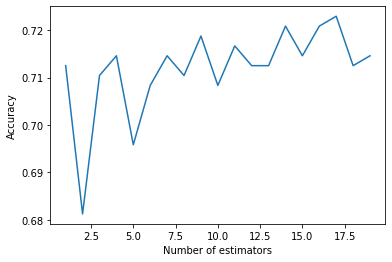

In [46]:
estimators = list(range(1, 20))
accuracy = []
for n_estimators in estimators:
    clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1), max_samples=0.2, n_estimators=n_estimators)
    clf.fit(X_treino, Y_treino)
    acc = clf.score(X_teste, Y_teste)
    accuracy.append(acc)
    print("Acuracia nos dados de Teste: n_estimators :",n_estimators, "acc :", acc )
plt.plot(estimators, accuracy)
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy")
plt.show()

In [41]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Definindo os valores para o número de folds
num_folds = 10
num_instances = len(X)
seed = 7

# Separando os dados em folds
kfold = model_selection.KFold(num_folds, shuffle=True, random_state = seed)
cart = DecisionTreeClassifier()

# Definindo o número de trees
num_trees = 100

# Criando o modelo
modelo = BaggingClassifier(base_estimator = cart, n_estimators = num_trees, random_state = seed)
resultado = model_selection.cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
R_BDT = {'Bagged Decision Trees ': resultado.mean()}
print(R_BDT)

0.8280149371069182


## AdaBoost

In [61]:
from sklearn.ensemble import AdaBoostClassifier
# Definindo os valores para o número de folds
num_folds = 10
num_instances = len(X)
seed = 7

# Definindo o número de trees
num_trees = 30

# Separando os dados em folds
kfold = model_selection.KFold(num_folds, shuffle=True, random_state = seed)

# Criando o modelo
modelo = AdaBoostClassifier(n_estimators = num_trees, random_state = seed)
resultado = model_selection.cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print(resultado.mean())

0.7460809748427673


In [62]:
R_ADA = {'AdaBoost ': resultado.mean()}
print(R_ADA)

{'AdaBoost ': 0.7460809748427673}


### Gradient Boosting

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
# Definindo os valores para o número de folds
num_folds = 10
num_instances = len(X)
seed = 7

# Definindo o número de trees
num_trees = 100

# Separando os dados em folds
kfold = model_selection.KFold(num_folds, shuffle=True, random_state = seed)

# Criando o modelo
modelo = GradientBoostingClassifier(n_estimators = num_trees, random_state = seed)
resultado = model_selection.cross_val_score(modelo, X, Y, cv = kfold)

# Print do resultado
print(resultado.mean())

0.7711084905660377


In [64]:
R_GB = {'Gradient Boosting ': resultado.mean()}
print(R_GB)

{'Gradient Boosting ': 0.7711084905660377}


### GaussianNB

In [65]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_treino, Y_treino)
from sklearn import metrics
predict_test = model.predict(X_teste)
resultado = metrics.accuracy_score(Y_teste, predict_test)

GaussianNB = {'GaussianNB ': resultado}
print(GaussianNB)

{'GaussianNB ': 0.7375}


## TENSORFLOW:

In [ ]:
#!pip install tensorflow
#!pip install keras
import keras
import tensorflow
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Initialize the constructor
model = Sequential()
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_treino.shape[1]))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))
model.summary()

In [ ]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_treino, Y_treino, batch_size=32, epochs=50)
y_pred = (model.predict(X_teste) > 0.5).astype("int32")
R_TENSORFLOW = {'TENSORFLOW': metrics.accuracy_score(Y_teste, y_pred)}
print(R_TENSORFLOW)

In [ ]:
print(R_BDT)
print(R_ADA)
print(R_GB)
print(GaussianNB)
print(R_TENSORFLOW)